# System Design Basics

Learning notes from [Grokking the system design](https://www.educative.io/courses/grokking-the-system-design-interview/3jEwl04BL7Q)

Before designing large system, there are three things we should consider aforehead:

1. What are the different architectural pieces that can be used?
2. How do these pieces work with each other.
3. How can we best utilize these pieces, and consider what are the right tradeoffs?

# Key Characters of Distributed Systems

The key characters of distributed systems include Scalability, Reliability, Availability, Efficiency, and Manageability.

1. Scalability
2. Reliability
3. Availability
4. Efficiency
5. Manageability

## Scalability

Scalability is the capability of a system, process, or a network to handle growing demand.

Because system is not fixed in its lifetime, somtimes it requires to scale up according to **increased data volume or amount of work (e.g. transactions)**. A scalable system would be able to achieve this scaling without performance loss.

### Performance Degradation

The performance of a system designed to be scalable, but in fact it declines with the system size due to the **management or environment cost**.

- Network: network speed may become solwer due to the distance between servers.
- Task: some tasks may not be able to perform simultaneously due to its inherent atomic nature or the flaw in the system design.

### Horizontal vs. Vertical Scaling

Horizontal scaling means the pool of resources, which can be multiple servers while Vertical scaling means to scale up the resources to an existing server.

In distributed system, horizontal scaling is often easier than vertical scaling because it can add extra servers dynamically without disturbing the existsing system. And vertical scaling is largely limited to the capacity of a single server, which often involves downtime and its upper limit.

- Example:
    - Horizontal Scaling
        1. Cassandra
        2. MongoDB
    - Vertical Scaling
        1. MySQL
        
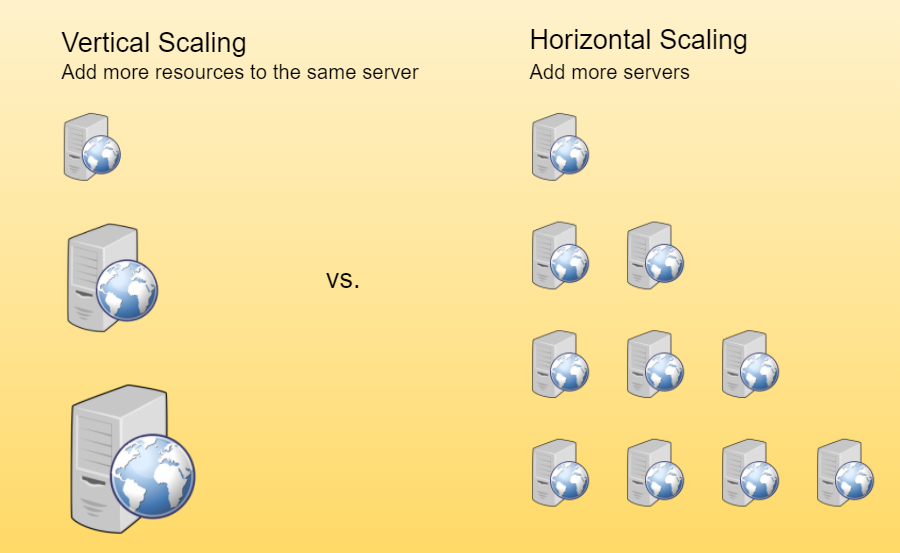

## Reliability

The definition of reliability is the probability a system will fail in a given period. In other words, **a distributed system is considered reliable if it keeps serving its services even when some of its software/hardware components fail**. A reliable system should be able to replace any failing machine with another healthy one.

### Example

For instance, Amazon's primary requirement is that any user transaction should never be canceled due to a failure of the machine that is running that transaction. A reliable distributed system achieves this through redundancy of both the software components and data. **Don't put everything in one place.**

## Availability

The definition of availability is the time a system remains operational to perform its service in a specific period. Availability takes into account maintainability, repair time, spares availability, and other logistics considerations.

Reliability is availability over time considering the full range of possible real-world conditions that can occur.

### Reliability vs. Availability

**If a system is reliable, then it is available.**

**However, if it is available, it is not necessarily reliable.**

## Efficiency

Assume we have an operation running in a distributed manner. Two standard measures of its efficiency are **the response time (or latency) that denotes the delay to obtain the first time and the throughput (or bandwidth) which denotes the number of items delivered in a given time unit**.

Measures:
- Number of messages globally sent by the nodes of the system regardless of the message size.
- Size of messages representing the volume of data exchanges.

The analysis of a distributed structure in terms of 'number of messages' is over-simplistic, because it ignores the impact of many aspects, including the network topology, the network load, and its variation, the possible heterogeneity of the software and hardware components involved in data processing and routing.

## Manageability / Serviceability

Manageability is **the simplicity and speed with which a system can be repaired or maintained**. Things to consider including the ease of diagnosing and understanding problems when they occur, ease of making updates or modifications, and how simple the system is to operatre.

# Load Balancing

Load Balancer (LB) is another critical component of any distributed system. Its goal is to **spread the traffic across a cluster of servers** to improve responsiveness and availability of applications, websites or databases. LB also keep track of the status of all the resources while distributing requests. LB needs to stop sending requests to unavailable servers.

Typically a LB sits between client and the server, and distributing the traffic across multiple backend servers using various algorithms. LB balances the loading on each server to prevent single server to fail, thus improving overall application availability and responsiveness.

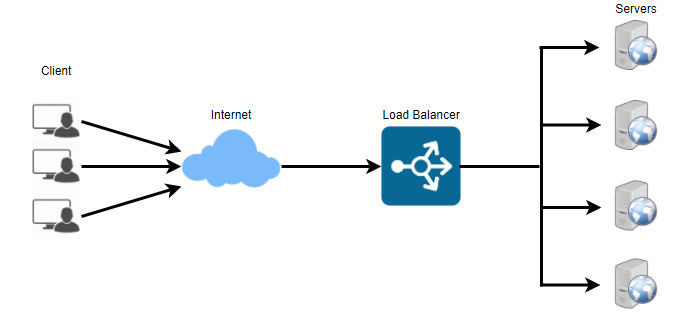

There are three components we can balance the load layer by layer.

1. Between the user and the web server
2. Between web servers and an internal platform layer (application servers or cache servers)
3. Between internal platform layer and database

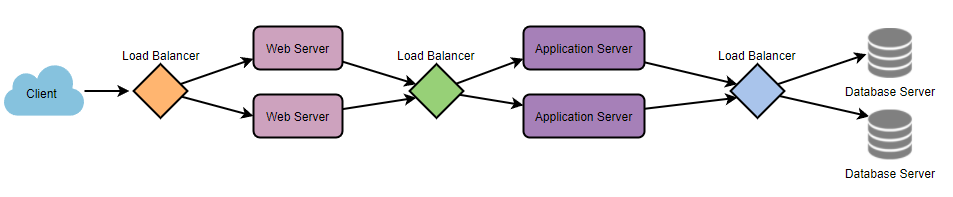

## Benefits

1. Users experience fater, uninterrupted service.
2. Service providers experience less downtime and higher throughput.
3. Ease of handling requests and decreasing process time.
4. Predictive analytics that determine traffic bottlenecks before they happend.
5. System administrators experience fewer failed or stressed components.

## Algorithms

Before forwarding a request to a backend server, LB should consider **two factors**.

1. Server health checks
2. LB algorithms

It is extremely important for LB to **only forward traffic to "healthy" servers.** "Health checks" regularly checks servers to ensure its healthiness. Once a server is detected a failed, it should be removed from the listening pool until it pass the health checks again.

### Health Checks

- Least Connection Method
    - Similar to LFU algorithm, algorithm directs traffic to the server with the fewest active connections. Useful in large number of persistent client connections.
- Least Response Time Method
    - Algorithm directs traffic to the server with the fewest active connections and the lowest average response time.
- Least Bandwidth Method
    - Chooses server with the least amount traffic.
- Round Robin Method
    - Cycles the choice through a list of servers. **Useful in servers are of equal specification and not many persistent connections**.
- Weighted Round Robin Method
    - Designed to better handle servers with different processing capacities.
- IP Hash
    - Directs traffic based on the client's IP address.
    
## Redundant LB

LB itself might be a single point of failure, so a system can add extra LB to support the first service in a cluster form. Once the main LB fails, the second LB takes over.

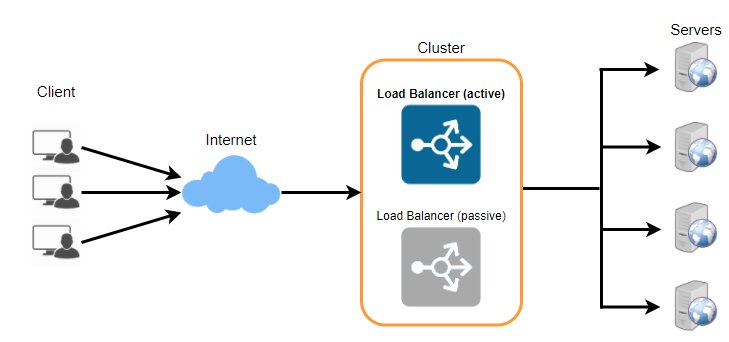

# Caching

Caching is the technique to better use the resources the system has, and making unattainable product requirements feasible. The principle is: **"recently requested data is likely to be requested again"**. Caching is widely adopted in every computing layer: hardware, operating systems, web browsers, web applications, and more. A cache is like short-term memory: it has a limited amount of space, but is typically faster than the original data source and contains the most recently accessed items.

Caches can exist at all levels in architecture, but are often found at the level nearest to the front end. That's because they are implemented to return data quickly without taxing downstream levels.

## Application Server Cache

Placing a cache directly on a request layer node enables the local storage of response data.

If data is in the cache, then return it. Else locate it in memory (fast) and on the node's local disk (faster than network storage).

However, the architecture might encounter cache misses if there are many nodes, because each node host its own cache. There are two solutions for this hurdle.

1. Global caches
2. Distributed caches

## Content Delivery (Distribution) Network (CDN)

CDNs are a kind of cache that comes into play for sites serving large amounts of static media.

If the system we are building is not large enough to have its own CDN, we can ease a future transition by serving the static media off a separate subdomain using a lightweight HTTP server like Nginx, and cut-over the DNS from servers to a CDN later.

## Cache Invalidation

It's important to ensure that the cache is coherent with the source of truth. If there's a change in data source, the data in cache should be invalidated, or it can cause inconsistent application behavior.

There are three main schemas that are used:

### Write-through cache

Data is written into the cache and the corresponding database simultaneously.

- Pros:
    - Allows for fast retrieval
    - Reliable that nothing will get lost in case of a server failure.
- Cons:
    - Higher writing latency before returning to the client (double writings).
    
### Write-around cache

Data is written to the permanent storage directly without saving to cache. This reduces the writing operations on request, but high latency when accessing recently modified data (cache miss).

### Write-back cache

Data is first written to cache, and completed the task immediately right after it. It is low-latency and high-throughput for write-intensive applications, but it has potential risks for **data loss**.

## Cache Eviction Policies

1. First In First Out (FIFO)
2. Last In First Out (LIFO)
3. Least Recently Used (LRU)
4. Most Recently Used (MRU)
5. Least Frequently Used (LFU)
6. Random Replacement (RR)

# Data Partitioning

Data partitioning is a technique to break a big database into many smaller parts. It can improve the manageability, performance, availability, and load balancing of an application. After a certain scale point, it is cheaper and more feasible to scale horizontally by adding more machines than grow it vertically by adding beefier servers.

## Partitioning Method

### Horizontal Partitioning

Horizontal Parititoning is also known as Data Sharding, by placing different rows into different tables. The key problem is that the partitioning strategy should be applied carefully or that it might cause **unbalanced servers**.

### Vertical Partitioning

Divide data to store tables related to a specific feature in their server. It is easy to implement, but it is difficult to handle unexpected growth of scale.

### Directory-Based Partitioning

Create a lookup service to find where data locates. Because of its loosely design, it can add extra servers to the schema smoothly.

## Partitioning Criteria

### Hash-based Partitioning

Design a hash function to determine data storage location. The hash function has to ensure the uniform allocation of data among servers or it might cause unbalanced servers.

If using number of DB as hash function, it might require extra justification after servers modification.

### List Partitioning

Predefine a group to store data.

### Round-robin Partitioning

Save data in turns of i mod n. It ensures uniform data distribution.

### Composite Partitioning

Combination of multiple strategies to compose a new schema.

## Problems

### Joins and Denormalization

It is common to use joins to connect multiple tables, and it is a trouble when data partitioning strategy is applied. A common workaround is to denormalize the database to reduce the joins.

### Referential Integrity

Trying to enforce data integrity constraints (e.g. foreign keys) in a partitioned database can be difficult. Often in such cases, applications have to run SQL jobs to clean up dangling references.

### Rebalancing

Doing rebalancing without incurring downtime is extremely difficult. It can be achieved smoothly with directory-based partitioning.